In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

### dataset preparation ###

In [30]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


int32


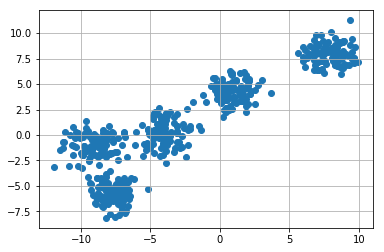

In [10]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [98]:
k=5

color=["green","red",'blue',"yellow","orange"]
clusters={}
for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i]=cluster

In [22]:
#print(clusters)

{0: {'center': array([-7.93033578, -5.47731088]), 'points': [], 'color': 'green'}, 1: {'center': array([-4.56773716,  7.0872799 ]), 'points': [], 'color': 'red'}, 2: {'center': array([-4.65724838, -4.4189253 ]), 'points': [], 'color': 'blue'}, 3: {'center': array([ 7.34685138, -8.42740266]), 'points': [], 'color': 'yellow'}, 4: {'center': array([ 1.84940688, -4.01921273]), 'points': [], 'color': 'orange'}}


In [99]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))
   



In [100]:
#Assign every data point to one of the cluster

#E-Step

def assignPointToClusters(clusters):
    
    for i in range(X.shape[0]):
        dist=[]
        curr_x=X[i]

        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster=np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)
    

In [101]:
#M-step
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if(pts.shape[0]>0):
            new_center=pts.mean(axis=0)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[]
        else:
            #clusters[kx]['center']=10*(2*np.random.random()-1)
            print(clusters[kx]['center'])
        

In [102]:
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
            
         #plot the cluster center
       # print(len(clusters[kx]['points']))    
        ck=clusters[kx]['center']
        plt.scatter(ck[0],ck[1],color='black',marker="^")

[ 4.2055156  -2.73312666]
[ 5.49694536 -1.27199414]


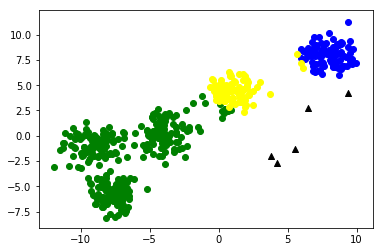

In [103]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

[ 4.2055156  -2.73312666]
[ 5.49694536 -1.27199414]


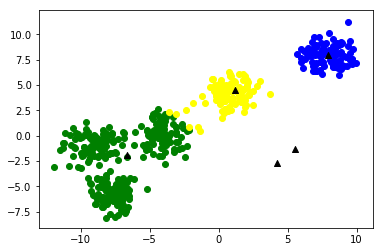

In [104]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

[ 4.2055156  -2.73312666]
[ 5.49694536 -1.27199414]


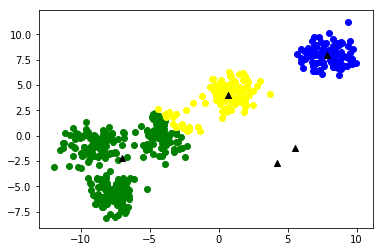

In [105]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

[ 4.2055156  -2.73312666]
[ 5.49694536 -1.27199414]


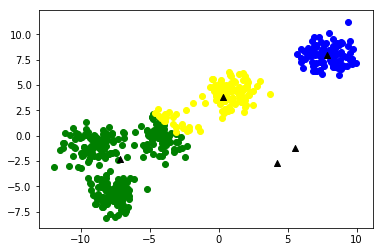

In [106]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

[ 4.2055156  -2.73312666]
[ 5.49694536 -1.27199414]


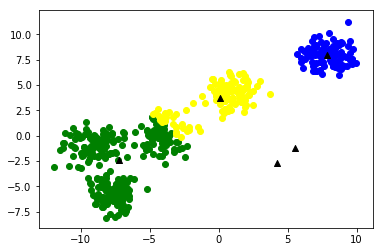

In [107]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

### USING SCI-KIT LEARN ###

In [123]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [109]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


In [112]:
from sklearn.cluster import KMeans

In [114]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [119]:
centers=kmeans.cluster_centers_
pred=kmeans.labels_

Text(0.5,1,'prediction')

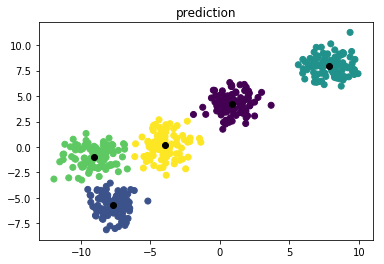

In [122]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],color="black")

plt.title("prediction")

### K-means and DBSCAN ###

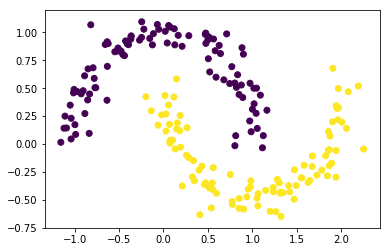

In [132]:
X,Y=make_moons(n_samples=200,noise=.10)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
            

In [133]:
km=KMeans(n_clusters=2)
km.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

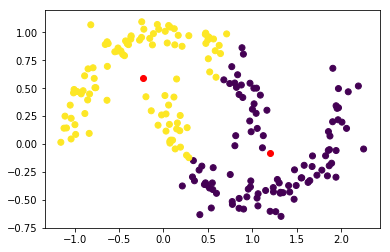

In [137]:
centers=km.cluster_centers_
label=km.labels_

plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()
#problem with K-Means

### solution is DBSCAN ###

### density based spatial clustering of application with noise ###

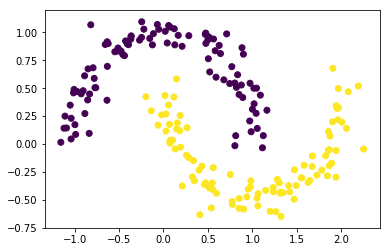

In [138]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [140]:
##based upon on the idea tht a cluster is a high density area surrounded by low density area
from sklearn.cluster import DBSCAN

dbs=DBSCAN(eps=0.2,min_samples=5)
dbs.fit(X)
Ypred=dbs.fit_predict(X)
print(Ypred)

[ 0  1  1  0  0  0  0  1  0  1  0  0  0  0  0  1  1  0  1  1  0  0  1 -1
  0  0  0  0  1  0  1  0  0  0  0  0  1  1  0  1  1  0  1  0  0  0  0  1
  1  1  1  0  0  0  0  1  1  0  0  1 -1  1  1  1  1  1  1  0  0  1  1  1
  1  0  1  0  1  1  1  1  1  0  0  0  1  0  0  0  1  1  0  0  1  1  1  1
  0  0  1  0  1  1  1  0  1  1  0  0  0 -1  1  0  1  0  1  1  1  1  0  0
  1  1  0  1  0  1  0  0 -1  0  1  1  1 -1  0  1  0  1  1  1  1  1  0  0
  0  0  0  0  1  0  1  1  1  0  1  0  1  1  1  0  1  1  0  1  1  1  0  0
  1  0  1  0  1  1  0  0  0  0  0  0  1  1  0  0  1  0  0  1  0  0  0  0
  1  0  1  0  1  1  1  1]


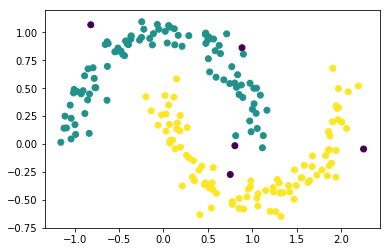

In [142]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()